In [174]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import statsmodels

import scipy
from scipy import stats

In [212]:
np.__version__

'1.14.5'

In [213]:
matplotlib.__version__

'2.1.2'

In [214]:
statsmodels.__version__

'0.8.0'

In [215]:
scipy.__version__

'1.0.0'

### Loading dataset

##### Here we are taking a dataset in which only height column is there that is taken from 500_Person_Gender_Height_Weight_Body_Mass_Index dataset
Source: https://www.kaggle.com/yersever/500-person-gender-height-weight-bodymassindex

In [123]:
height_data = pd.read_csv('dataset/height_data.csv')

height_data.head(10)

,Height
0,174
1,189
2,185
3,195
4,149
5,189
6,147
7,154
8,174
9,169


##### shape of dataset (rows, columns)

In [124]:
height_data.shape

(500, 1)

#### Measures of central tendency (NumPy and Pandas)

In [125]:
np.mean(height_data['Height'])

169.944

In [126]:
np.median(height_data['Height'])

170.5

In [127]:
np.mode(height_data['Height'])

AttributeError: module 'numpy' has no attribute 'mode'

In [128]:
height_data['Height'].mean()

169.944

In [129]:
height_data['Height'].median()

170.5

In [130]:
height_data['Height'].mode()

0    188
dtype: int64

#### Measures of central tendency (statsmodels)

In [131]:
from statsmodels.stats.weightstats import DescrStatsW

In [132]:
height_descr = DescrStatsW(height_data['Height'])

height_descr.mean

169.944

In [133]:
from scipy import stats

stats.mode(height_data['Height'])

ModeResult(mode=array([188]), count=array([15]))

##### Min & Max

In [134]:
min_height = np.min(height_data['Height'])
max_height = np.max(height_data['Height'])

min_height, max_height

(140, 199)

##### Range

In [135]:
range_height = np.ptp(height_data['Height'])

range_height

59

In [136]:
max_height - min_height

59

##### Percentile (using numpy)

##### 25th percentile

In [137]:
q1 = np.percentile(height_data['Height'], 25, interpolation='lower')

q1

156

In [185]:
height_data['Height'].quantile(0.25)

156.0

In [186]:
height_descr.quantile(probs=0.25)

p
0.25    156
dtype: int64

##### 75th percentile

In [140]:
q3 = np.percentile(height_data['Height'], 75, interpolation='lower')

q3

184

In [187]:
height_data['Height'].quantile(0.75)

184.0

In [188]:
height_descr.quantile(probs=0.75)

p
0.75    184
dtype: int64

##### Interquartile range

In [189]:
stats.iqr(height_data['Height'])

28.0

In [190]:
q3 - q1

28

##### Variance (using numpy)

variance of height

In [191]:
var_height = np.var(height_data['Height'])

var_height

267.6128640000003

##### Variance (using statsmodels)

where     
height = DescrStatsW(height_data['Height'])    

variance of height

In [192]:
height_descr.var

267.61286400000006

##### Standard Deviation (using numpy)

standard deviation of height

In [193]:
std_height = np.std(height_data['Height'])

std_height

16.35887722308595

In [194]:
height_descr.std

16.358877223085944

##### standard deviation is equal to square root of variance

In [195]:
np.sqrt(height.var)

16.358877223085944

##### Skewness using scipy

It is the degree of distortion from the normal distribution. It measures the lack of symmetry in data distribution.

-- Positive Skewness means when the tail on the right side of the distribution is longer or fatter. The mean and median will be greater than the mode.    

-- Negative Skewness is when the tail of the left side of the distribution is longer or fatter than the tail on the right side. The mean and median will be less than the mode.  

In [196]:
stats.skew(height_data['Height'])

-0.12154764352037799

##### Skewness using statsmodel

Returns:  
sk1 (ndarray) – The standard skewness estimator.  
sk2 (ndarray) – Skewness estimator based on quartiles.   
sk3 (ndarray) – Skewness estimator based on mean-median difference, standardized by absolute deviation.   
sk4 (ndarray) – Skewness estimator based on mean-median difference, standardized by standard deviation.

In [197]:
from statsmodels.stats import stattools

stattools.robust_skewness(height_data['Height'])

(-0.12154764352037792,
 -0.03571428571428571,
 -0.03938792859166985,
 -0.002077628076952278)

##### Kurtosis using scipy

It is actually the measure of outliers present in the distribution.

-- High kurtosis in a data set is an indicator that data has heavy tails or outliers.       
-- Low kurtosis in a data set is an indicator that data has light tails or lack of outliers.

In [198]:
stats.kurtosis(height_data['Height'])

-1.1204815940488286

##### Kurtosis using statsmodels

Returns:     
kr1 (ndarray) – The standard kurtosis estimator.   
kr2 (ndarray) – Kurtosis estimator based on octiles.    
kr3 (ndarray) – Kurtosis estimators based on exceedence expectations.    
kr4 (ndarray) – Kurtosis measure based on the spread between high and low quantiles

In [199]:
stattools.robust_kurtosis(height_data['Height'])

(-1.1204815940488286,
 -0.2598808297709315,
 -0.5946456820201633,
 -0.9058469516701639)

#### Describe using scipy

In [200]:
stats.describe(height_data['Height'])

DescribeResult(nobs=500, minmax=(140, 199), mean=169.944, variance=268.1491623246493, skewness=-0.12154764352037799, kurtosis=-1.1204815940488286)

In [201]:
height_data.describe()

,Height
count,500.000000
mean,169.944000
std,16.375261
min,140.000000
25%,156.000000
50%,170.500000
75%,184.000000
max,199.000000


### Visualizing statistics

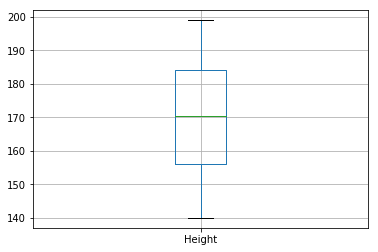

In [208]:
height_data.boxplot()

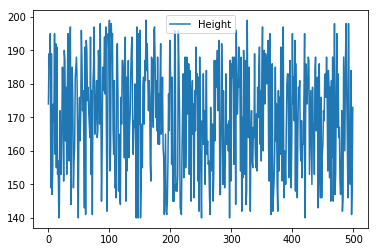

In [209]:
plt.figure(figsize=(10, 8))

height_data.plot.line()

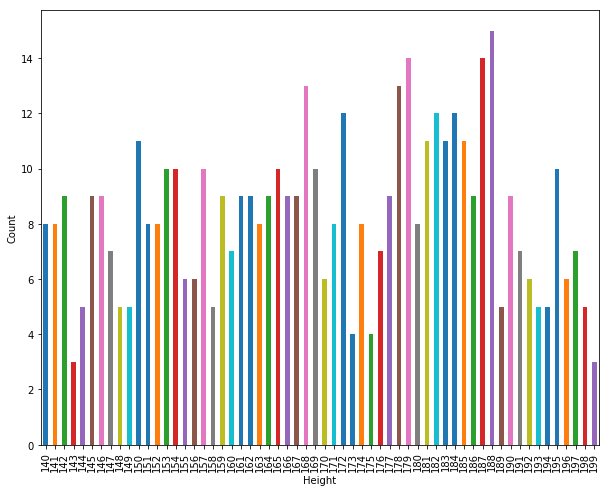

In [210]:
plt.figure(figsize=(10, 8))

height_data['Height'].value_counts().sort_index().plot.bar()

plt.xlabel('Height')
plt.ylabel('Count')

plt.show()

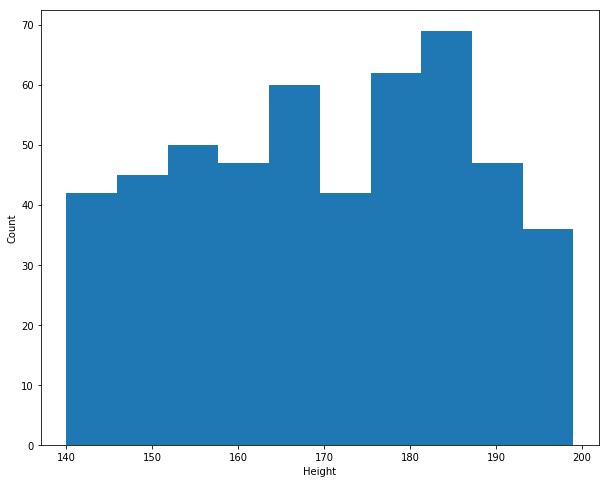

In [211]:
plt.figure(figsize=(10, 8))

height_data['Height'].plot.hist()

plt.xlabel('Height')
plt.ylabel('Count')

plt.show()